In [1]:
from fine_tuning_tabpfn.finetune_tabpfn import fine_tune_tabpfn
# from tabpfn.model.gatedtransformerv2 import GatedPerFeatureTransformer
from tabpfn.model.gatedtransformer import GatedPerFeatureTransformer

In [2]:
from fine_tuning_tabpfn.finetune_tabpfn import fine_tune_tabpfn
from sklearn.datasets import load_iris, load_wine, fetch_openml,load_digits, load_breast_cancer
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from tabpfn.classifier import TabPFNClassifier
import torch.nn as nn
import torch
from sklearn.metrics import accuracy_score,precision_score,recall_score
import numpy as np
import pandas as pd


In [8]:
def load_synthetic_lspin_easy():
    np.random.seed(42)
    Xs1 = np.random.normal(loc=1,scale=0.5,size=(300,5))
    Ys1 = -2*Xs1[:,0]+1*Xs1[:,1]-0.5*Xs1[:,2]
    
    Xs2 = np.random.normal(loc=-1,scale=0.5,size=(300,5))
    Ys2 = -0.5*Xs2[:,2]+1*Xs2[:,3]-2*Xs2[:,4]
    X_data = np.concatenate((Xs1,Xs2),axis=0)
    Y_data = np.concatenate((Ys1.reshape(-1,1),Ys2.reshape(-1,1)),axis=0)
    Y_data = Y_data-Y_data.min()
    Y_data=Y_data/Y_data.max()
    y_labels = np.concatenate((np.array([0]*300),np.array([1]*300)))
    X_data = pd.DataFrame(X_data)
    y_labels = pd.DataFrame(y_labels)
    return X_data, y_labels

def load_synthetic_data_lspin_hard():
    N_train = 1500
    N_valid=300
    N_test = 300
    D=7
    np.random.seed(42)
    group_size=int(N_train/3)
    X_train = np.sign(np.random.normal(0,1,(N_train,D)))
    X_train = np.concatenate((X_train,
                             np.concatenate(([-1]*group_size,[0]*group_size,[1]*group_size)).reshape(-1,1)),axis=1)
    Y_train = np.concatenate((X_train[:group_size,0]*X_train[:group_size,1]+2*X_train[:group_size,-1],
                              X_train[group_size:(group_size*2),1]*X_train[group_size:(group_size*2),2]+2*X_train[group_size:(group_size*2),-1],
                              X_train[(group_size*2):(group_size*3),2]*X_train[(group_size*2):(group_size*3),3]+2*X_train[(group_size*2):(group_size*3),-1],
                             ),axis=0)
    Y_train = pd.DataFrame(Y_train)
    Y_train[0] = Y_train[0].apply(lambda x: 0 if x == 1 else x)
    Y_train[0] = Y_train[0].apply(lambda x: 1 if x == -1 else x)
    Y_train[0] = Y_train[0].apply(lambda x: 2 if x == 3 else x)
    Y_train[0] = Y_train[0].apply(lambda x: 3 if x == -3 else x)
    return pd.DataFrame(X_train), Y_train

In [13]:
# Load data
# X, y = load_wine(return_X_y=True, as_frame=True)
# X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X,y = load_synthetic_data_lspin_hard()
# Load MNIST from OpenML; as_frame=True returns a Pandas DataFrame.
# mnist = fetch_openml('mnist_784', version=1, as_frame=True)
# X, y = mnist["data"], mnist["target"]
# y = y.astype(int)
# digits = load_digits()
# X, y = pd.DataFrame(digits.data), pd.Series(digits.target)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42,
    shuffle=True
)

Loaded gating model for attention
Loaded Gated Model
torch.Size([1, 5025, 192])


Fine-tuning Steps:   0%|                                                                     | 1/10000 [00:00<?, ?it/s]

torch.Size([8, 3365, 192])
torch.Size([1, 5025, 192])


Fine-tuning Steps:   0%| | 2/10000 [00:10<30:15:39, 10.90s/it, Best Val. Loss=0.000281, Best Val. Score=-0.000281, Trai

torch.Size([8, 3365, 192])
torch.Size([1, 5025, 192])


Fine-tuning Steps:   0%| | 3/10000 [00:19<26:45:03,  9.63s/it, Best Val. Loss=0.000281, Best Val. Score=-0.000281, Trai

torch.Size([8, 3365, 192])
torch.Size([1, 5025, 192])


Fine-tuning Steps:   0%| | 4/10000 [00:28<25:41:34,  9.25s/it, Best Val. Loss=0.000281, Best Val. Score=-0.000281, Trai

torch.Size([8, 3365, 192])
torch.Size([1, 5025, 192])


Fine-tuning Steps:   0%| | 5/10000 [00:37<25:14:18,  9.09s/it, Best Val. Loss=0.00028, Best Val. Score=-0.00028, Traini

torch.Size([8, 3365, 192])
torch.Size([1, 5025, 192])


Fine-tuning Steps:   0%| | 6/10000 [00:46<24:59:56,  9.01s/it, Best Val. Loss=0.000244, Best Val. Score=-0.000244, Trai

torch.Size([8, 3365, 192])
torch.Size([1, 5025, 192])


Fine-tuning Steps:   0%| | 7/10000 [00:54<24:51:20,  8.95s/it, Best Val. Loss=0.000228, Best Val. Score=-0.000228, Trai

torch.Size([8, 3365, 192])
torch.Size([1, 5025, 192])


Fine-tuning Steps:   0%| | 8/10000 [01:03<24:44:50,  8.92s/it, Best Val. Loss=0.000218, Best Val. Score=-0.000218, Trai

torch.Size([8, 3365, 192])
torch.Size([1, 5025, 192])


Fine-tuning Steps:   0%| | 9/10000 [01:12<24:40:59,  8.89s/it, Best Val. Loss=0.000204, Best Val. Score=-0.000204, Trai

torch.Size([8, 3365, 192])
torch.Size([1, 5025, 192])


Fine-tuning Steps:   0%| | 10/10000 [01:21<24:38:26,  8.88s/it, Best Val. Loss=0.000196, Best Val. Score=-0.000196, Tra

torch.Size([8, 3365, 192])
torch.Size([1, 5025, 192])


Fine-tuning Steps:   0%| | 11/10000 [01:30<24:37:23,  8.87s/it, Best Val. Loss=0.000172, Best Val. Score=-0.000172, Tra

torch.Size([8, 3365, 192])
torch.Size([1, 5025, 192])


Fine-tuning Steps:   0%| | 12/10000 [01:39<24:35:37,  8.86s/it, Best Val. Loss=0.00016, Best Val. Score=-0.00016, Train

torch.Size([8, 3365, 192])
torch.Size([1, 5025, 192])


Fine-tuning Steps:   0%| | 13/10000 [01:48<24:34:39,  8.86s/it, Best Val. Loss=0.000158, Best Val. Score=-0.000158, Tra

torch.Size([8, 3365, 192])
torch.Size([1, 5025, 192])


Fine-tuning Steps:   0%| | 14/10000 [01:56<24:34:07,  8.86s/it, Best Val. Loss=0.000141, Best Val. Score=-0.000141, Tra

torch.Size([8, 3365, 192])
torch.Size([1, 5025, 192])


Fine-tuning Steps:   0%| | 15/10000 [02:05<24:34:08,  8.86s/it, Best Val. Loss=0.00013, Best Val. Score=-0.00013, Train

torch.Size([8, 3365, 192])
torch.Size([1, 5025, 192])


Fine-tuning Steps:   0%| | 16/10000 [02:14<24:34:35,  8.86s/it, Best Val. Loss=0.00013, Best Val. Score=-0.00013, Train

torch.Size([8, 3365, 192])
torch.Size([1, 5025, 192])


Fine-tuning Steps:   0%| | 17/10000 [02:23<24:37:13,  8.88s/it, Best Val. Loss=0.000122, Best Val. Score=-0.000122, Tra

torch.Size([8, 3365, 192])
torch.Size([1, 5025, 192])


Fine-tuning Steps:   0%| | 18/10000 [02:32<24:38:45,  8.89s/it, Best Val. Loss=0.000116, Best Val. Score=-0.000116, Tra

torch.Size([8, 3365, 192])
torch.Size([1, 5025, 192])


Fine-tuning Steps:   0%| | 19/10000 [02:41<24:39:57,  8.90s/it, Best Val. Loss=0.000114, Best Val. Score=-0.000114, Tra

torch.Size([8, 3365, 192])
torch.Size([1, 5025, 192])


Fine-tuning Steps:   0%| | 20/10000 [02:50<24:40:47,  8.90s/it, Best Val. Loss=0.000105, Best Val. Score=-0.000105, Tra

torch.Size([8, 3365, 192])
torch.Size([1, 5025, 192])


Fine-tuning Steps:   0%| | 21/10000 [02:59<24:41:09,  8.91s/it, Best Val. Loss=0.000104, Best Val. Score=-0.000104, Tra

torch.Size([8, 3365, 192])
torch.Size([1, 5025, 192])


Fine-tuning Steps:   0%| | 22/10000 [03:08<24:41:44,  8.91s/it, Best Val. Loss=9.14e-5, Best Val. Score=-9.14e-5, Train

torch.Size([8, 3365, 192])
torch.Size([1, 5025, 192])


Fine-tuning Steps:   0%| | 22/10000 [03:17<26:00:40,  9.38s/it, Best Val. Loss=8.96e-5, Best Val. Score=-8.96e-5, Train


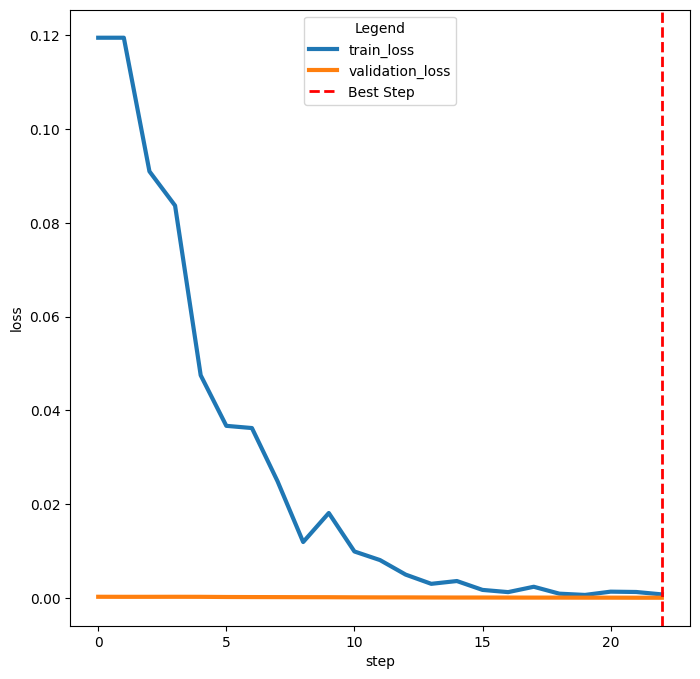

In [15]:



# Finetune
save_path_to_fine_tuned_model = "./fine_tuned_model_new_28_03_gated_ls2.ckpt"
fine_tune_tabpfn(
    path_to_base_model="auto",
    save_path_to_fine_tuned_model=save_path_to_fine_tuned_model,
    # Finetuning HPs
    time_limit=200,
    finetuning_config={"learning_rate": 0.00001, "batch_size": 8,"min_patience": 300,"max_patience": 1000},
    validation_metric="log_loss",
    # Input Data
    X_train=X_train,
    y_train=y_train,
    categorical_features_index=None,
    device="cuda",  # use "cpu" if you don't have a GPU
    task_type="multiclass",
    gated=True,
    # Optional
    show_training_curve=True,  # Shows a final report after finetuning.
    logger_level=-100,  # Shows all logs, higher values shows less
    use_wandb=False,  # Init wandb yourself, and set to True
)




In [16]:

gated_model = TabPFNClassifier(
    model_path=save_path_to_fine_tuned_model,
    gated=True
)
# Then, use gated_model in your fine-tuning pipeline.
clf = gated_model.fit(X_train, y_train)
print("Log Loss (Default):", log_loss(y_test, clf.predict_proba(X_test)))

Loaded gating model for attention
Loaded Gated Model
torch.Size([1, 12000, 192])


C:\conda_envs\ds310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


torch.Size([1, 12000, 192])
torch.Size([1, 9000, 192])
torch.Size([1, 9000, 192])
Log Loss (Default): 0.001342459457530876


In [17]:
accuracy_score(y_test,np.argmax(clf.predict_proba(X_test),axis=1)),\
precision_score(y_test,np.argmax(clf.predict_proba(X_test),axis=1),\
average='weighted'),\
recall_score(y_test,np.argmax(clf.predict_proba(X_test),axis=1),average='weighted')

torch.Size([1, 12000, 192])
torch.Size([1, 12000, 192])
torch.Size([1, 9000, 192])
torch.Size([1, 9000, 192])
torch.Size([1, 12000, 192])
torch.Size([1, 12000, 192])
torch.Size([1, 9000, 192])
torch.Size([1, 9000, 192])
torch.Size([1, 12000, 192])
torch.Size([1, 12000, 192])
torch.Size([1, 9000, 192])
torch.Size([1, 9000, 192])


(1.0, 1.0, 1.0)

## OG

Loaded Regular Model


Fine-tuning Steps:   0%| | 22/10000 [03:17<26:01:24,  9.39s/it, Best Val. Loss=2.21e-5, Best Val. Score=-2.21e-5, Train


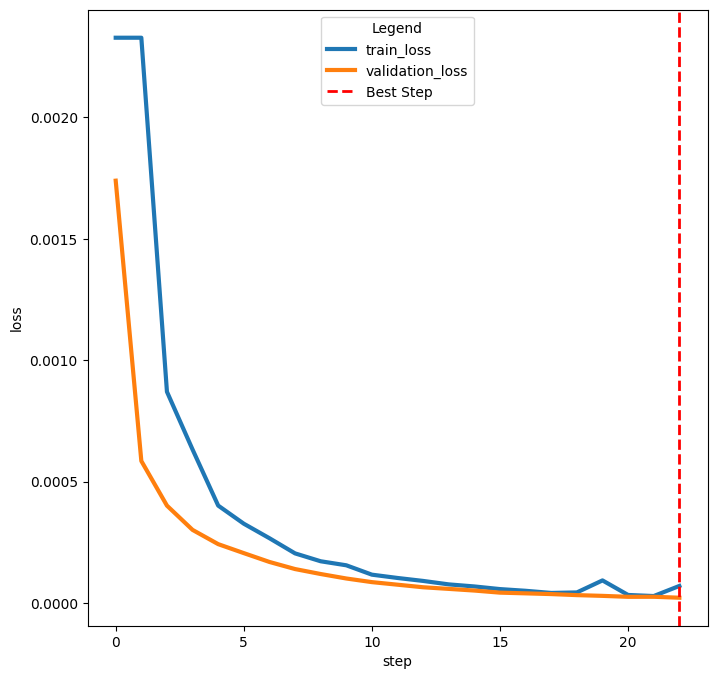

In [18]:

# Load data
# X, y = load_breast_cancer(return_X_y=True, as_frame=True)
# X,y = load_synthetic_lspin_hard()
# # X, y = load_wine(return_X_y=True, as_frame=True)
# # Load MNIST from OpenML; as_frame=True returns a Pandas DataFrame.
# # mnist = fetch_openml('mnist_784', version=1, as_frame=True)
# # X, y = mnist["data"], mnist["target"]
# # y = y.astype(int)
# # digits = load_digits()
# # X, y = pd.DataFrame(digits.data), pd.Series(digits.target)
# X_train, X_test, y_train, y_test = train_test_split(
#     X,
#     y,
#     test_size=0.33,
#     random_state=42,
#     shuffle=True
# )

# Finetune
save_path_to_fine_tuned_model = 'base_model_lsh.ckpt'
fine_tune_tabpfn(
    path_to_base_model="auto",
    save_path_to_fine_tuned_model=save_path_to_fine_tuned_model,
    # Finetuning HPs
  time_limit=200,
    finetuning_config={"learning_rate": 0.00001, "batch_size": 8,"min_patience": 300,"max_patience": 1000},
    validation_metric="log_loss",
    # Input Data
    X_train=X_train,
    y_train=y_train,
    categorical_features_index=None,
    device="cuda",  # use "cpu" if you don't have a GPU
    task_type="multiclass",
    # Optional
    show_training_curve=True,  # Shows a final report after finetuning.
    logger_level=-100,  # Shows all logs, higher values shows less
    use_wandb=False,  # Init wandb yourself, and set to True
)




In [19]:

reg_model = TabPFNClassifier(
    model_path=save_path_to_fine_tuned_model,
)
# Then, use gated_model in your fine-tuning pipeline.
clf = reg_model.fit(X_train, y_train)
print("Log Loss (Default):", log_loss(y_test, clf.predict_proba(X_test)))

Loaded Regular Model


C:\conda_envs\ds310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Log Loss (Default): 0.002286559913825934


In [20]:
accuracy_score(y_test,np.argmax(clf.predict_proba(X_test),axis=1)),\
precision_score(y_test,np.argmax(clf.predict_proba(X_test),axis=1),\
average='weighted'),\
recall_score(y_test,np.argmax(clf.predict_proba(X_test),axis=1),average='weighted')

(1.0, 1.0, 1.0)

In [19]:
7.619565389988202e-07 < 4.820173226820382e-06

True